## Import the required libraries

In [113]:
!pip install ddeint
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint
import csv
import os
import math
from numpy.linalg import eig

# Stability Analysis

In [114]:
## Definition of the parameters of the MSFR
# Initial data
Q_0 =3000000000 # [W] core thermal power
Tf_in = 650 # [°C] core fuel inlet temperature
Tf_0 = 700 # [°C] fuel average temperature
Tf_out = 750 # [°C] core fuel outlet temperature
Gf = 18822 # [kg/s] core fuel mass flow rate
mf = 37129 # [kg] total core fuel mass
cf = 1594 # [J/kg/K] fuel specific heat
m1 = 25247 # [kg] fuel mass of IHX primary coolant

# Neutronics data
li = np.array([0.0125,0.0283,0.0425,0.133,0.292,0.666,1.63,3.55]) # λᵢ: delayed neutron decay constants (s⁻¹)
bi = np.array([24.8,48.67,41.54,64.79,95.48,11.47,19.22,4.03])*1e-5 # βi​: delayed neutron fractions per group (1e-5 converts values from pcm to a pure fraction)
b = 310*1e-5 # [pcm]

# Calculation Parameters
Delta_T = Tf_out - Tf_in # change in temperature
tau_c = mf/Gf # [s] Core circulation time
tau_ec = m1/Gf # [s] External loop circulation time
L = 10**(-5) # [s]

# Feedback coefficient
alpha_f = -5*1e-5 # [pcm/K]
alpha_h = 10e-5 # [pcm/cm]

In [115]:
# Definition of the dynamic matrices (8 group)
A_8G = np.zeros((18, 18)) # initiating matrix
A_8G[0,1] = Q_0/(mf*cf)
A_8G[1,0] = alpha_f/L
A_8G[1,1] = -b/L
for j in range(8):
    A_8G[1,j+2] = bi[j]/L
for i in range(8):
    A_8G[i+2,1] = li[i]
    A_8G[i+2,i+2] = -(li[i]+(1/tau_c))
    A_8G[i+10,i+10] = -(li[i]+(1/tau_c))
    A_8G[i+2,i+10] = np.exp(-(li[i]*tau_ec))/tau_c

<>:61: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
<>:61: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-1193991094.py:61: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel(f'Re($\omega$)')
/tmp/ipython-input-1193991094.py:62: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel(f'Im($\omega$)')


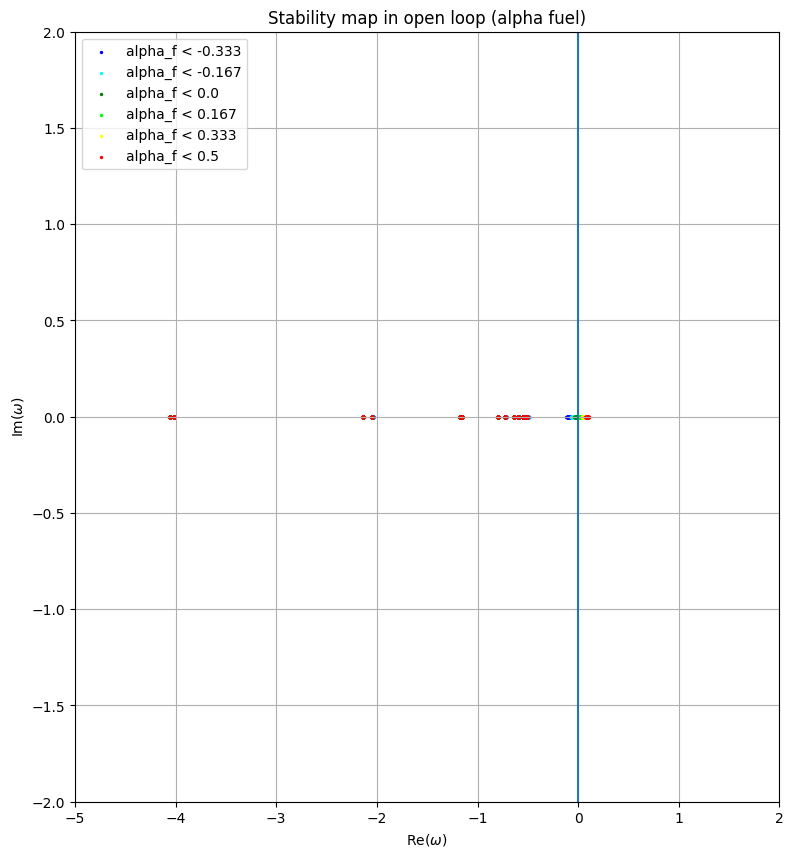

In [116]:
# Computation of the dynamic matrix eigenvalues and plotting them + the stability map (8 Groups, alpha fuel)
ALPHA_Start = -5e-1
ALPHA_End = 5e-1
M = 500
cut = M/6
A_8G_Ei_alp = np.copy(A_8G)
ALPHA = np.linspace(ALPHA_Start, ALPHA_End, M)
labelnames = []
space_division = []

for i in range(6):
    division = ALPHA_Start+((ALPHA_End-ALPHA_Start)*((i+1)*cut/M))
    labelnames.append('alpha_f <')
    labelnames.append(str(round(division, 3)))
    space_division.append(division)
plt.figure(figsize=(20,10))

for i,ALPHA_0 in enumerate(ALPHA):
    alpha_f_2 = ALPHA_0/(1e5)
    A_8G_Ei_alp[1,0] = alpha_f_2/L
    Eigenvalues=np.linalg.eigvals(A_8G_Ei_alp)
    plt.subplot(1,2,1)
    if ALPHA_0 <= space_division[0]:
        if labelnames[0] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'b' , s = 2, label = (labelnames[0]+' '+labelnames[1]))
            labelnames[0] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'b' , s = 2)
    elif ALPHA_0 <= space_division[1]:
        if labelnames[2] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'aqua' , s = 2, label = (labelnames[2]+' '+labelnames[3]))
            labelnames[2] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'aqua' , s = 2)
    elif ALPHA_0 <= space_division[2]:
        if labelnames[4] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'green' , s = 2, label = (labelnames[4]+' '+labelnames[5]))
            labelnames[4] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'green' , s = 2)
    elif ALPHA_0 <= space_division[3]:
        if labelnames[6] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'lime' , s = 2, label = (labelnames[6]+' '+labelnames[7]))
            labelnames[6] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'lime' , s = 2)
    elif ALPHA_0 <= space_division[4]:
        if labelnames[8] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'yellow' , s = 2, label = (labelnames[8]+' '+labelnames[9]))
            labelnames[8] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'yellow' , s = 2)
    elif ALPHA_0 <= space_division[5]:
        if labelnames[10] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'r' , s = 2, label = (labelnames[10]+' '+labelnames[11]))
            labelnames[10] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'r' , s = 2)

plt.title('Stability map in open loop (alpha fuel)')
plt.xlabel(f'Re($\omega$)')
plt.ylabel(f'Im($\omega$)')
plt.xlim(-5, 2)
plt.ylim(-2, 2)
plt.vlines(0,-2 , 2)
plt.legend(loc="upper left")
plt.grid()

<>:61: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
<>:61: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-2251625152.py:61: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel(f'Re($\omega$)')
/tmp/ipython-input-2251625152.py:62: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel(f'Im($\omega$)')


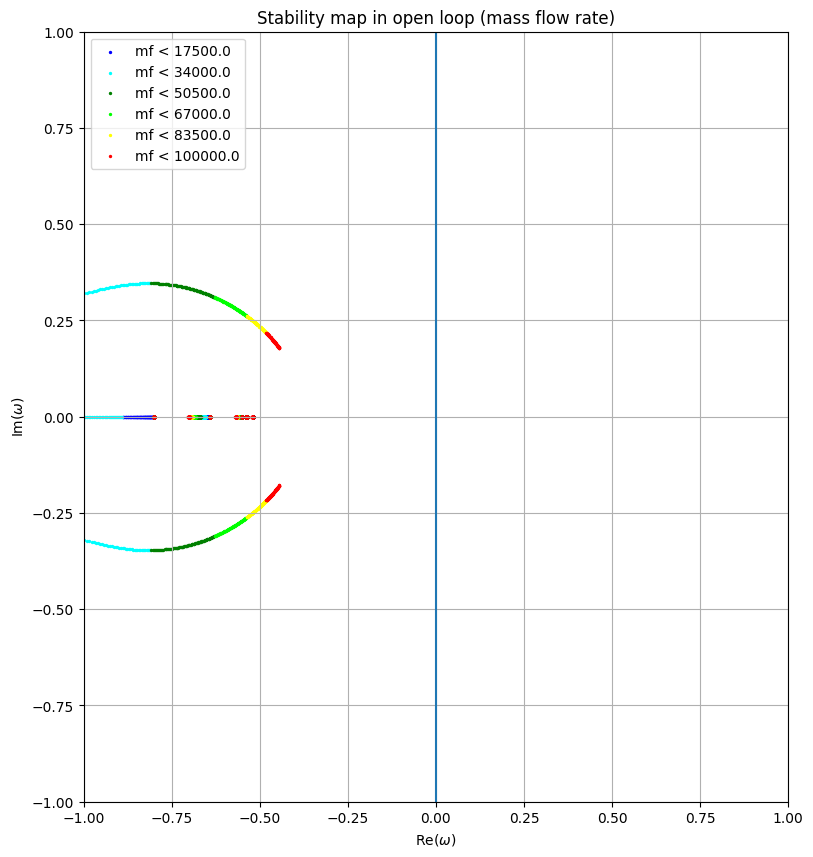

In [117]:
# Computation of the dynamic matrix eigenvalues and plotting them + the stability map (8 Groups, mass flowrate)
MF_Start = 1000
MF_End = 100000
M = 500
cut = M/6
A_8G_Ei_mf = np.copy(A_8G)
MF = np.linspace(MF_Start, MF_End, M)
labelnames = []
space_division = []

for i in range(6):
    division = MF_Start+((MF_End-MF_Start)*((i+1)*cut/M))
    labelnames.append('mf <')
    labelnames.append(str(round(division, 0)))
    space_division.append(division)
plt.figure(figsize=(20,10))

for i,MF_0 in enumerate(MF):
    mf_2 = MF_0
    A_8G_Ei_mf[0,1] = Q_0/(mf_2*cf)
    Eigenvalues=np.linalg.eigvals(A_8G_Ei_mf)
    plt.subplot(1,2,1)
    if MF_0 <= space_division[0]:
        if labelnames[0] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'b' , s = 2, label = (labelnames[0]+' '+labelnames[1]))
            labelnames[0] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'b' , s = 2)
    elif MF_0 <= space_division[1]:
        if labelnames[2] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'aqua' , s = 2, label = (labelnames[2]+' '+labelnames[3]))
            labelnames[2] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'aqua' , s = 2)
    elif MF_0 <= space_division[2]:
        if labelnames[4] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'green' , s = 2, label = (labelnames[4]+' '+labelnames[5]))
            labelnames[4] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'green' , s = 2)
    elif MF_0 <= space_division[3]:
        if labelnames[6] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'lime' , s = 2, label = (labelnames[6]+' '+labelnames[7]))
            labelnames[6] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'lime' , s = 2)
    elif MF_0 <= space_division[4]:
        if labelnames[8] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'yellow' , s = 2, label = (labelnames[8]+' '+labelnames[9]))
            labelnames[8] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'yellow' , s = 2)
    elif MF_0 <= space_division[5]:
        if labelnames[10] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'r' , s = 2, label = (labelnames[10]+' '+labelnames[11]))
            labelnames[10] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'r' , s = 2)

plt.title('Stability map in open loop (mass flow rate)')
plt.xlabel(f'Re($\omega$)')
plt.ylabel(f'Im($\omega$)')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.vlines(0,-2 , 2)
plt.legend(loc="upper left")
plt.grid()

<>:61: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
<>:61: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-3916886543.py:61: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel(f'Re($\omega$)')
/tmp/ipython-input-3916886543.py:62: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel(f'Im($\omega$)')


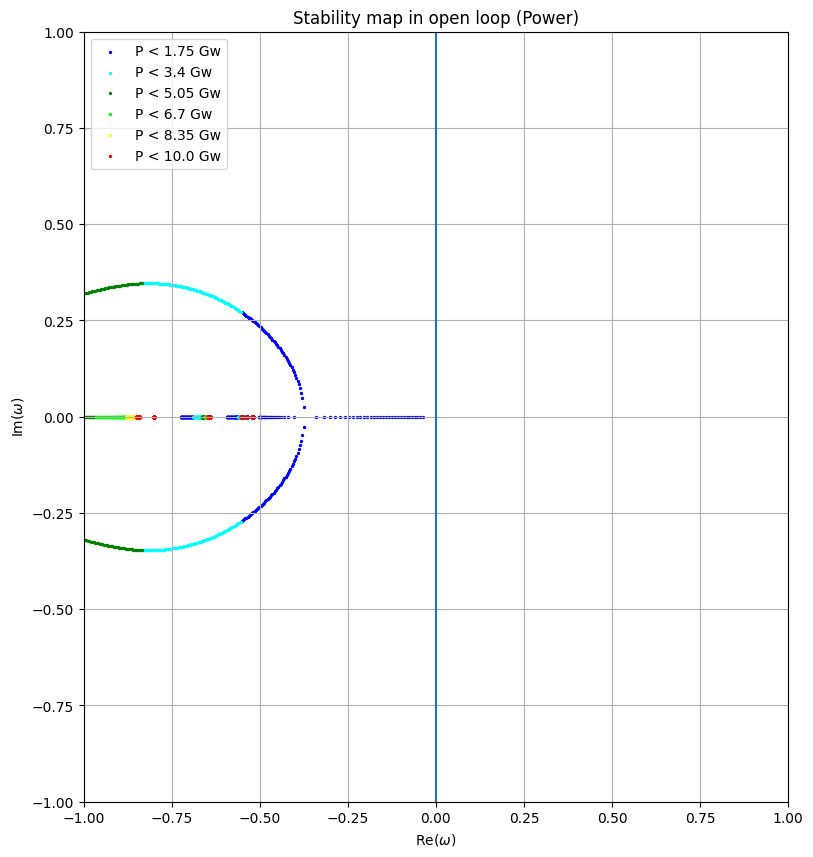

In [118]:
# Computation of the dynamic matrix eigenvalues and plotting them + the stability map (8 Groups, power)
P_Start = 0.1e9
P_End = 1e10
M = 500
cut = M/6
A_8G_Ei_p= np.copy(A_8G)
P = np.linspace(P_Start, P_End, M)
labelnames = []
space_division = []

for i in range(6):
    division = P_Start+((P_End-P_Start)*((i+1)*cut/M))
    labelnames.append('P <')
    labelnames.append(str(round(division, 0)/1e9))
    space_division.append(division)
plt.figure(figsize=(20,10))

for i,P_0 in enumerate(P):
    p_2 = P_0
    A_8G_Ei_p[0,1] = p_2/(mf*cf)
    Eigenvalues=np.linalg.eigvals(A_8G_Ei_p)
    plt.subplot(1,2,1)
    if P_0 <= space_division[0]:
        if labelnames[0] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'b' , s = 2, label = (labelnames[0]+' '+labelnames[1]+' Gw'))
            labelnames[0] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'b' , s = 2)
    elif P_0 <= space_division[1]:
        if labelnames[2] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'aqua' , s = 2, label = (labelnames[2]+' '+labelnames[3]+' Gw'))
            labelnames[2] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'aqua' , s = 2)
    elif P_0 <= space_division[2]:
        if labelnames[4] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'green' , s = 2, label = (labelnames[4]+' '+labelnames[5]+' Gw'))
            labelnames[4] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'green' , s = 2)
    elif P_0 <= space_division[3]:
        if labelnames[6] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'lime' , s = 2, label = (labelnames[6]+' '+labelnames[7]+' Gw'))
            labelnames[6] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'lime' , s = 2)
    elif P_0 <= space_division[4]:
        if labelnames[8] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'yellow' , s = 2, label = (labelnames[8]+' '+labelnames[9]+' Gw'))
            labelnames[8] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'yellow' , s = 2)
    elif P_0 <= space_division[5]:
        if labelnames[10] != None:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'r' , s = 2, label = (labelnames[10]+' '+labelnames[11]+' Gw'))
            labelnames[10] = None
        else:
            plt.scatter(np.real(Eigenvalues),np.imag(Eigenvalues), color = 'r' , s = 2)

plt.title('Stability map in open loop (Power)')
plt.xlabel(f'Re($\omega$)')
plt.ylabel(f'Im($\omega$)')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.vlines(0,-2 , 2)
plt.legend(loc="upper left")
plt.grid()

In [119]:
# 4 matrixes: A, B, C, & D
A = np.copy(A_8G)
print("A = ", A)

B = np.zeros((4,2))
B[0,0] = 1/tau_c
B[1,1] = alpha_h/L
print("B = ", B)

C = np.zeros((2,4))
C[0,0] = alpha_f
C[1,0] = 2
print("C = ", C)

D = np.zeros((2,2))
D[0,1] = alpha_h
D[1,0] = -1
print("D = ", D)

A =  [[ 0.00000000e+00  5.06896958e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.00000000e+00 -3.10000000e+02  2.48000000e+01  4.86700000e+01
   4.15400000e+01  6.47900000e+01  9.54800000e+01  1.14700000e+01
   1.92200000e+01  4.03000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.25000000e-02 -5.19435280e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  4.98506383e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.83000000e-02  0.00000000e+00 -5.35235280e-01
   0.00000000e+00  0.00000000e+0

# Non-Linear Model

In [120]:
# Definition of the input variables and the initial conditions
# Imput
Tin = Tf_in
dh = 2 # [cm]
U = np.array([Tin, dh])
print("Imput variables U = ", U)


# Initial conditions
Tf_0 = Tf_in+tau_c/2*(Q_0/(mf*cf))
print("Tf_0 = ", Tf_0)
TH_0 = np.array([Tf_0])
Eta_0 = np.zeros(8)
rho_arr = np.zeros(8)
rho_ext_input = alpha_h*U[1]
for i in range(8):
    Eta_0[i] = 1/(li[i]+(1/tau_c)*(1-np.exp(-li[i]*tau_ec)))*(bi[i]/L)*Q_0
    rho_arr[i]=L/Q_0*li[i]*Eta_0[i]
rho_ext= rho_ext_input+b-(rho_arr[0]+rho_arr[1]+rho_arr[2]+rho_arr[3]+rho_arr[4]+rho_arr[5]+rho_arr[6]+rho_arr[7])
print("Beta = ", b, "\nInitial reactivity = ", rho_ext)
NEU_0 = np.append(Q_0,Eta_0)
MSR_0 = np.append(TH_0, NEU_0)
print("Initial conditions = ", MSR_0)

#time point
T_start = 0
T_end = 10
D_t = L*50


Imput variables U =  [650   2]
Tf_0 =  699.9962202857464
Beta =  0.0031000000000000003 
Initial reactivity =  0.0013345415411562186
Initial conditions =  [6.99996220e+02 3.00000000e+09 3.55489356e+12 3.09456086e+12
 1.76538406e+12 9.00572170e+11 6.27764172e+11 3.56412571e+10
 2.77211979e+10 2.98326931e+09]


In [121]:
# Definition of the non-linear model
def MSFR_8G_model(X, t, d):
    Tf, Phi, Eta1, Eta2, Eta3, Eta4, Eta5, Eta6, Eta7, Eta8 = X(t)
    Tfsh, Phish, Eta1sh, Eta2sh, Eta3sh, Eta4sh, Eta5sh, Eta6sh, Eta7sh, Eta8sh = X(t-d)
    dTfdt = (Phi/(mf*cf))-2*(Tf-Tf_in)/tau_c
    dPhidt = (rho_ext+alpha_f*(Tf-Tf_0)-b)*Phi/L+Eta1*li[0]+Eta2*li[1]+Eta3*li[2]+Eta4*li[3]+Eta5*li[4]+Eta6*li[5]+Eta7*li[6]+Eta8*li[7]
    dEta1dt = bi[0]*Phi/L-Eta1*(li[0]+1/tau_c)+(Eta1sh/tau_c)*np.exp(-li[0]*tau_ec)
    dEta2dt = bi[1]*Phi/L-Eta2*(li[1]+1/tau_c)+(Eta2sh/tau_c)*np.exp(-li[1]*tau_ec)
    dEta3dt = bi[2]*Phi/L-Eta3*(li[2]+1/tau_c)+(Eta3sh/tau_c)*np.exp(-li[2]*tau_ec)
    dEta4dt = bi[3]*Phi/L-Eta4*(li[3]+1/tau_c)+(Eta4sh/tau_c)*np.exp(-li[3]*tau_ec)
    dEta5dt = bi[4]*Phi/L-Eta5*(li[4]+1/tau_c)+(Eta5sh/tau_c)*np.exp(-li[4]*tau_ec)
    dEta6dt = bi[5]*Phi/L-Eta6*(li[5]+1/tau_c)+(Eta6sh/tau_c)*np.exp(-li[5]*tau_ec)
    dEta7dt = bi[6]*Phi/L-Eta7*(li[6]+1/tau_c)+(Eta7sh/tau_c)*np.exp(-li[6]*tau_ec)
    dEta8dt = bi[7]*Phi/L-Eta8*(li[7]+1/tau_c)+(Eta8sh/tau_c)*np.exp(-li[7]*tau_ec)
    dXdt = np.array([dTfdt, dPhidt, dEta1dt, dEta2dt, dEta3dt, dEta4dt, dEta5dt, dEta6dt, dEta7dt, dEta8dt])
    return dXdt

In [122]:
# Solving the non-linear model
g = lambda IC : MSR_0
t = np.arange(T_start,T_end,D_t)
d = tau_ec
NL_Model_Results = ddeint(MSFR_8G_model,g,t,fargs=(d,))



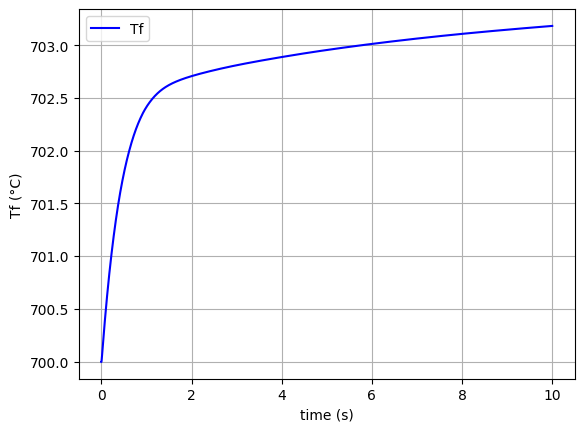

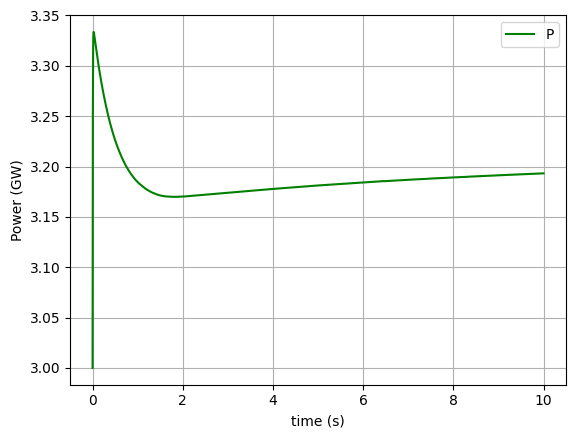

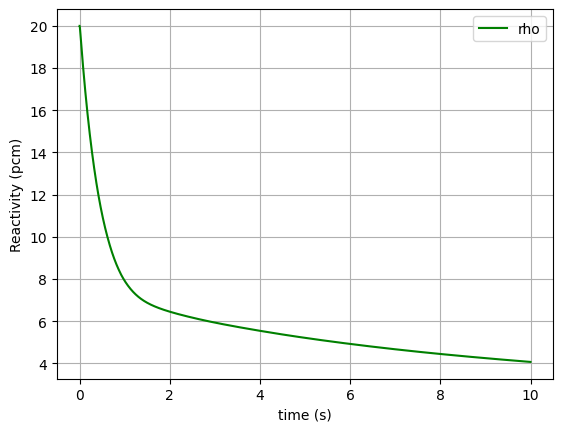

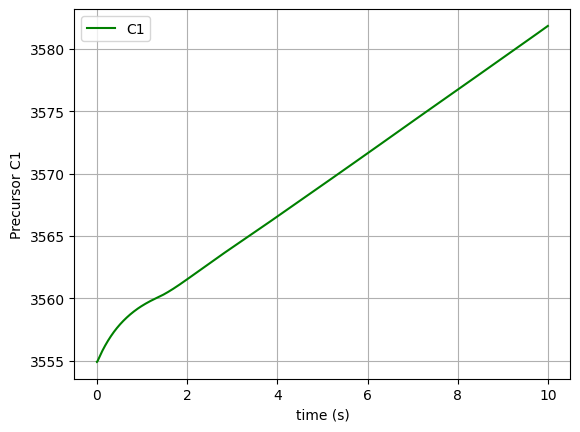

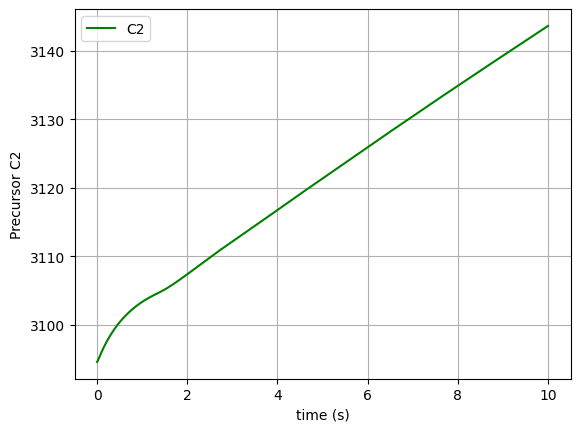

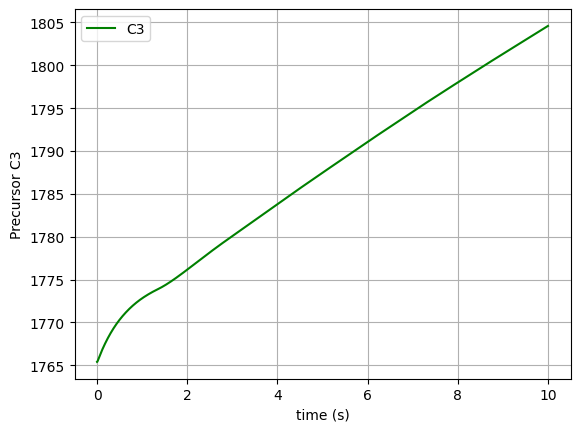

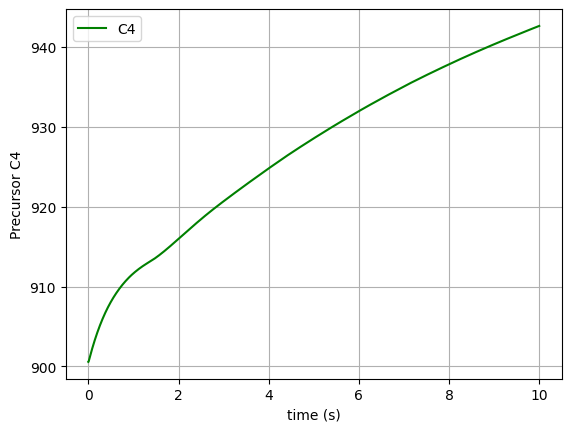

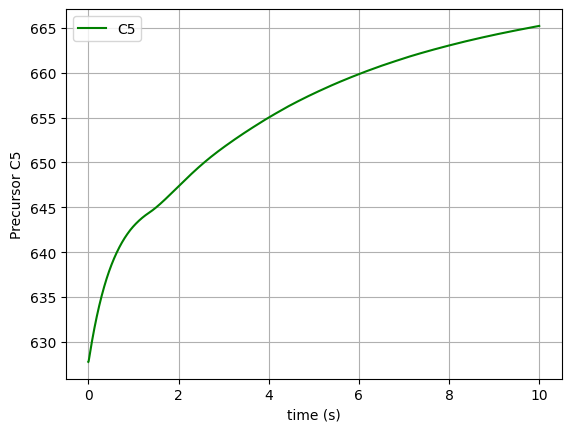

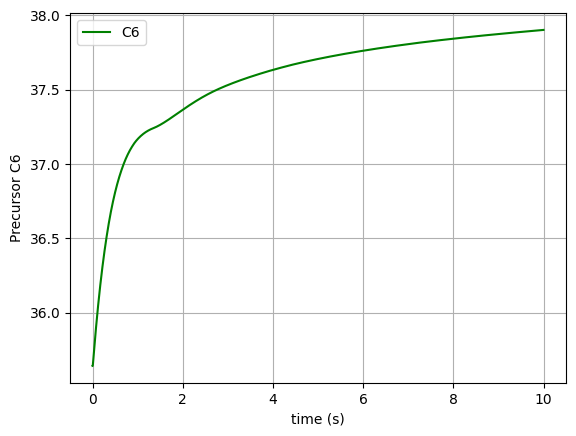

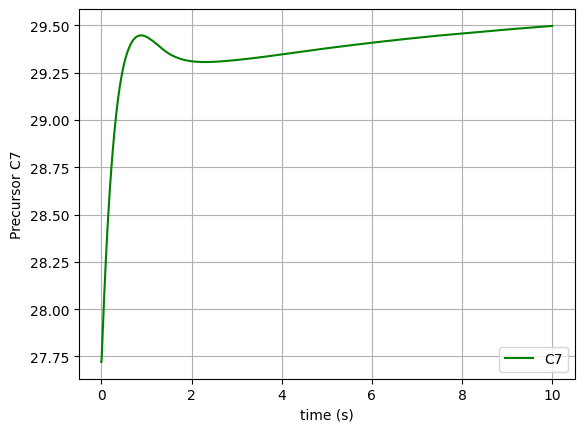

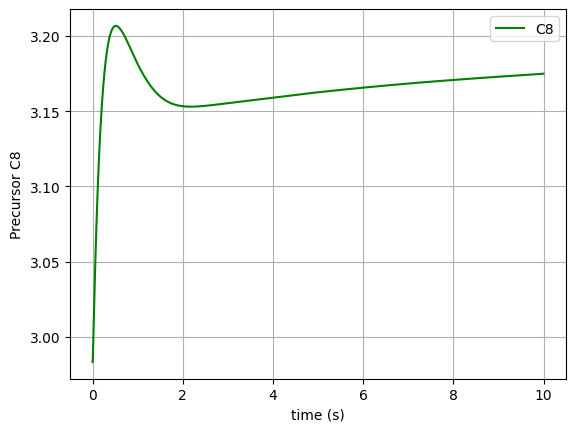

In [123]:
# Plotting the main quantities of interest
plt.plot(t,NL_Model_Results[:,0],'b-',label=r'Tf')
plt.ylabel('Tf (°C)')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_Results[:,1]/10**9,'g-',label=r'P')
plt.ylabel('Power (GW)')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,(alpha_h*U[1]+alpha_f*(NL_Model_Results[:,0]-Tf_0))*10**5,'g-',label=r'rho')
plt.ylabel('Reactivity (pcm)')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_Results[:,2]/10**9,'g-',label=r'C1')
plt.ylabel('Precursor C1')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_Results[:,3]/10**9,'g-',label=r'C2')
plt.ylabel('Precursor C2')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_Results[:,4]/10**9,'g-',label=r'C3')
plt.ylabel('Precursor C3')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_Results[:,5]/10**9,'g-',label=r'C4')
plt.ylabel('Precursor C4')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_Results[:,6]/10**9,'g-',label=r'C5')
plt.ylabel('Precursor C5')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_Results[:,7]/10**9,'g-',label=r'C6')
plt.ylabel('Precursor C6')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_Results[:,8]/10**9,'g-',label=r'C7')
plt.ylabel('Precursor C7')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_Results[:,9]/10**9,'g-',label=r'C8')
plt.ylabel('Precursor C8')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()

Testing for a value of the feedback coefficient Alpha_f =  -0.05


/tmp/ipython-input-3096158522.py:14: RuntimeWarning: overflow encountered in scalar multiply
  dPhidt = (rho_ext+alpha_f_new*(Tf-Tf_0)-b)*Phi/L+Eta1*li[0]+Eta2*li[1]+Eta3*li[2]+Eta4*li[3]+Eta5*li[4]+Eta6*li[5]+Eta7*li[6]+Eta8*li[7]
/usr/local/lib/python3.12/dist-packages/scipy/integrate/_ode.py:438: UserWarning: vode: Repeated convergence failures. (Perhaps bad Jacobian supplied or wrong choice of MF or tolerances.)
  self._y, self.t = mth(self.f, self.jac or (lambda: None),
/usr/local/lib/python3.12/dist-packages/scipy/interpolate/_interpolate.py:497: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.12/dist-packages/scipy/integrate/_ode.py:438: UserWarning: vode: Illegal input detected. (See printed message.)
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


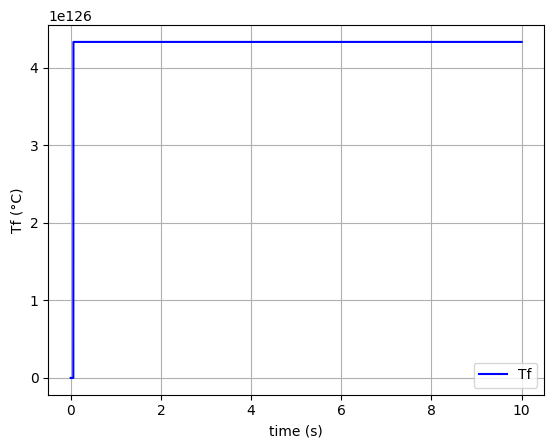

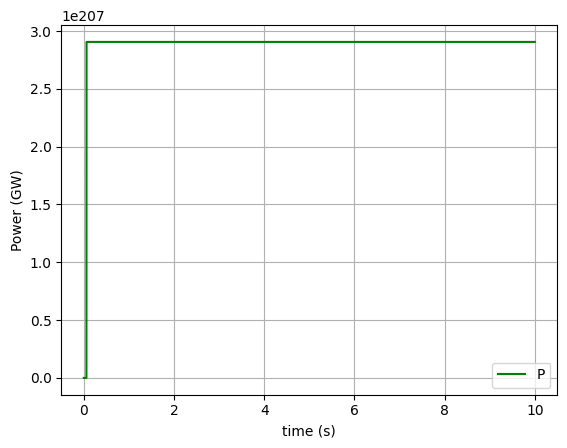

Testing for a value of the feedback coefficient Alpha_f =  -0.005


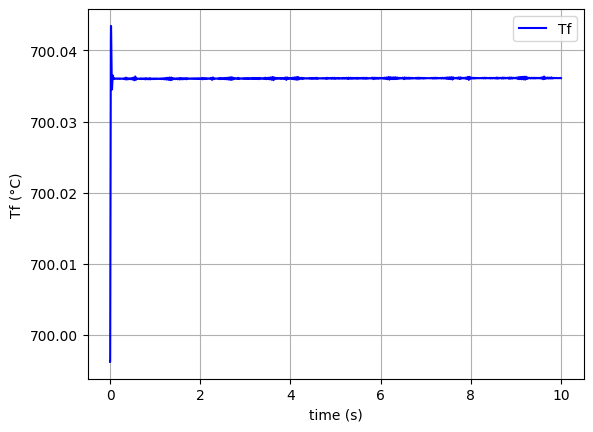

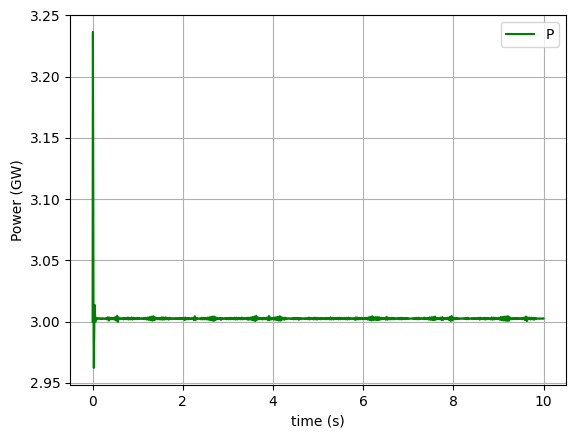

Testing for a value of the feedback coefficient Alpha_f =  -0.0005


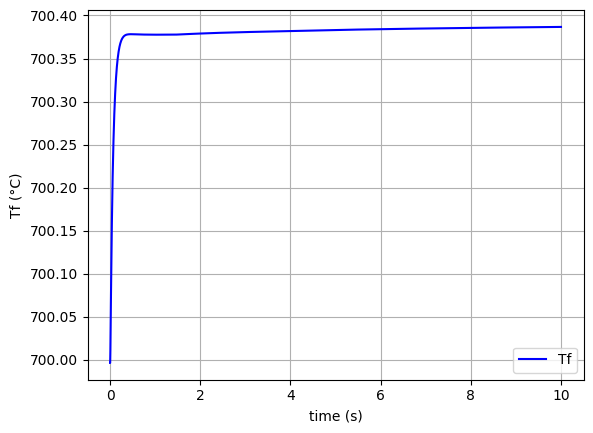

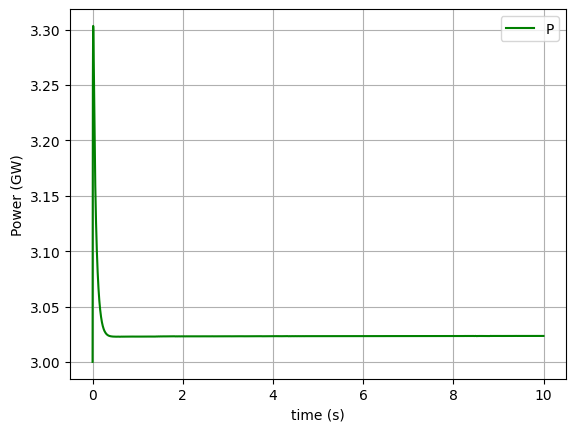

Testing for a value of the feedback coefficient Alpha_f =  -5e-05


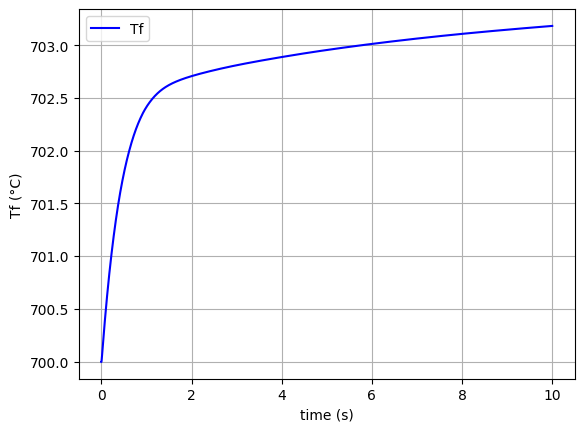

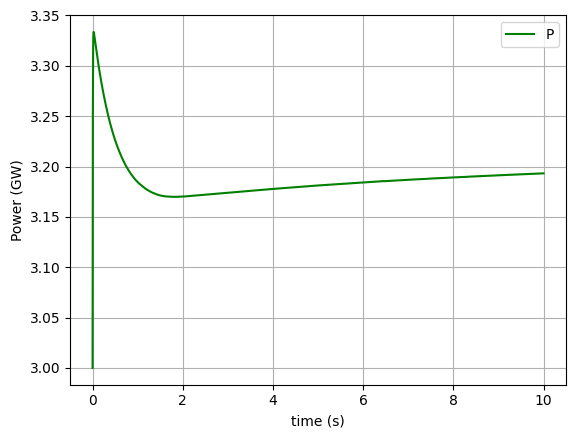

Testing for a value of the feedback coefficient Alpha_f =  -5e-06


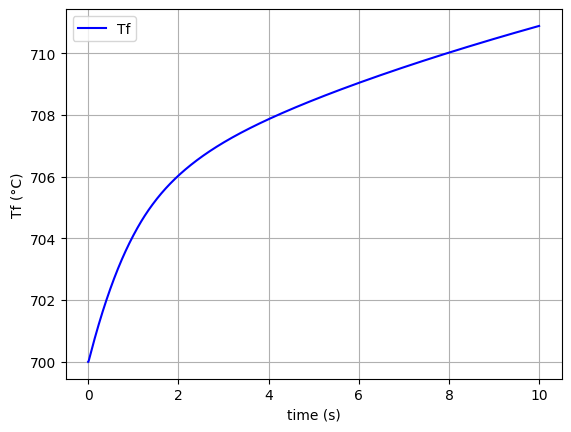

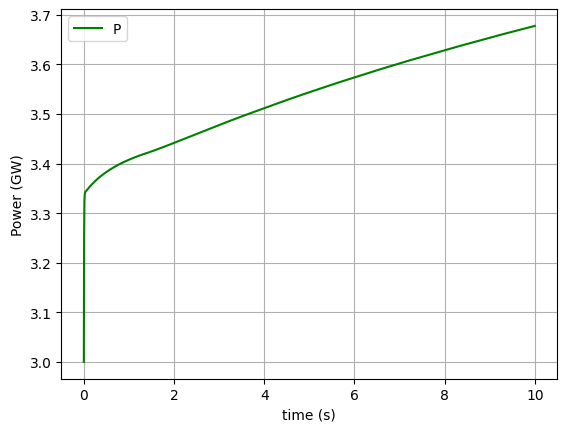

Testing for a value of the feedback coefficient Alpha_f =  0.0


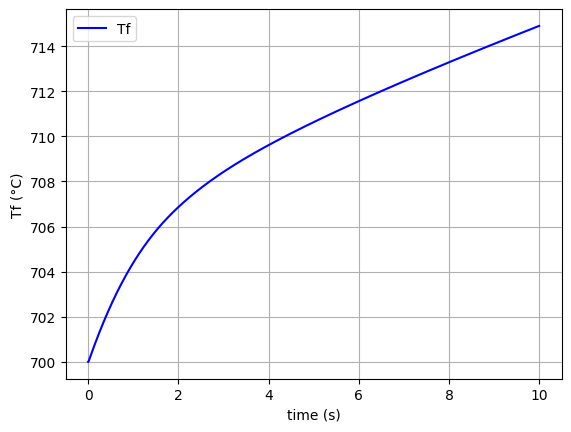

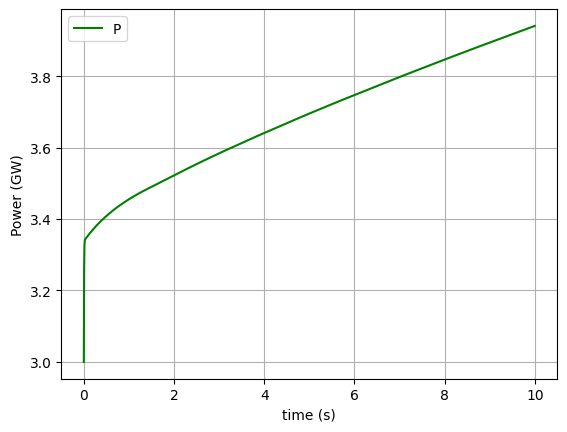

Testing for a value of the feedback coefficient Alpha_f =  5e-07


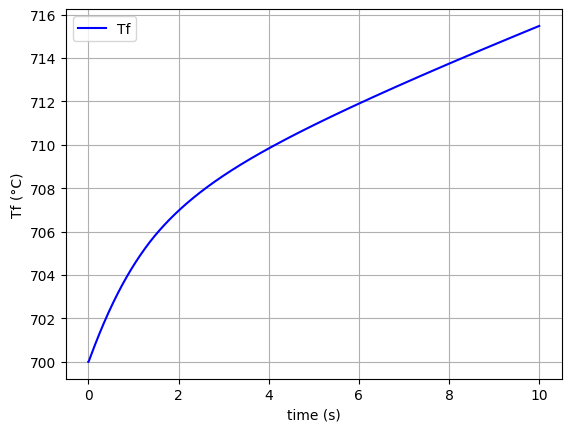

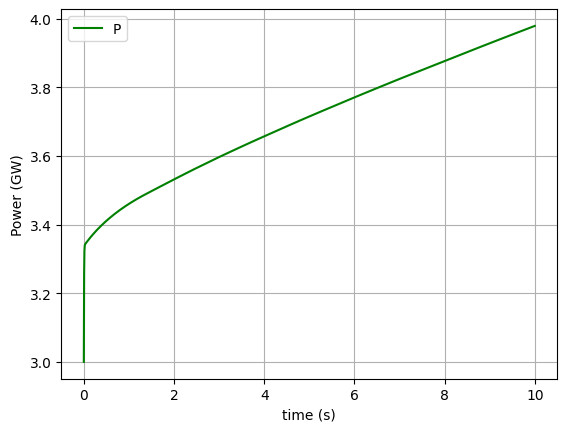

Testing for a value of the feedback coefficient Alpha_f =  5e-06


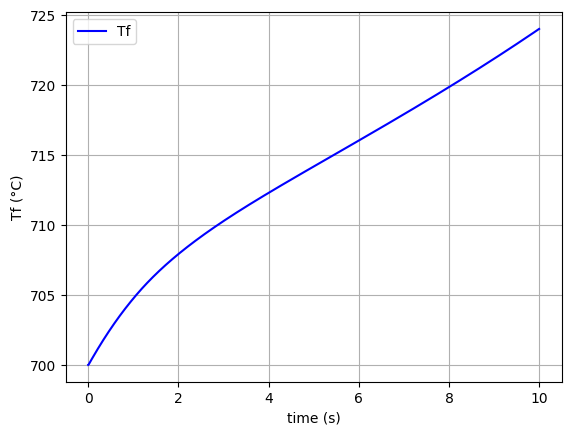

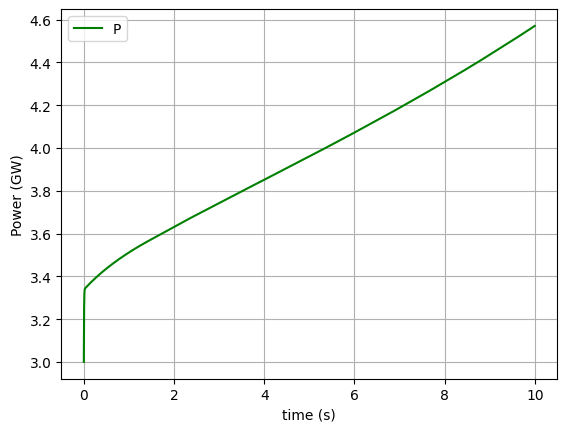

Testing for a value of the feedback coefficient Alpha_f =  5e-05


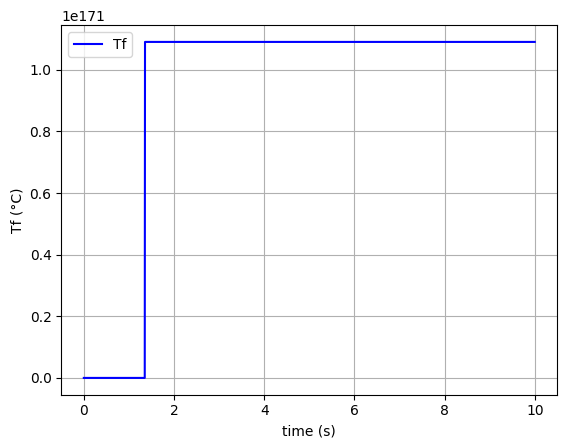

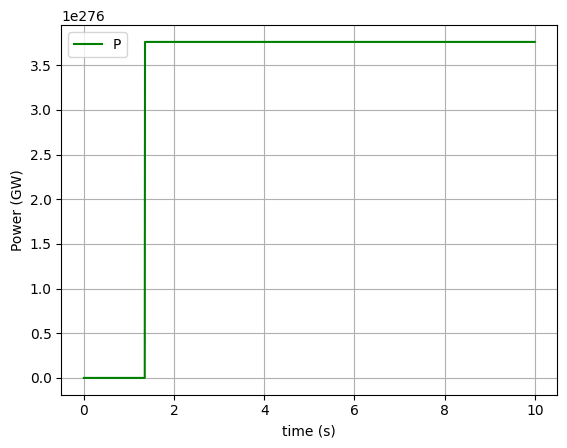

In [124]:
# Verification: solving the non-linear model for different values of the feedback coefficients.

# Feedback coefficient
alpha_f_test = np.array([-5.e-02, -5.e-03, -5.e-04, -5.e-05, -5.e-06,  0,  5.e-07,  5.e-06,  5.e-05]) # [pcm/K]

# New non-linear model
for i in range(len(alpha_f_test)):
    alpha_f_new = alpha_f_test[i]
    print("Testing for a value of the feedback coefficient Alpha_f = ",alpha_f_new)
    def MSFR_8G_model_test(X, t, d):
        Tf, Phi, Eta1, Eta2, Eta3, Eta4, Eta5, Eta6, Eta7, Eta8 = X(t)
        Tfsh, Phish, Eta1sh, Eta2sh, Eta3sh, Eta4sh, Eta5sh, Eta6sh, Eta7sh, Eta8sh = X(t-d)
        dTfdt = (Phi/(mf*cf))-2*(Tf-Tf_in)/tau_c
        dPhidt = (rho_ext+alpha_f_new*(Tf-Tf_0)-b)*Phi/L+Eta1*li[0]+Eta2*li[1]+Eta3*li[2]+Eta4*li[3]+Eta5*li[4]+Eta6*li[5]+Eta7*li[6]+Eta8*li[7]
        dEta1dt = bi[0]*Phi/L-Eta1*(li[0]+1/tau_c)+(Eta1sh/tau_c)*np.exp(-li[0]*tau_ec)
        dEta2dt = bi[1]*Phi/L-Eta2*(li[1]+1/tau_c)+(Eta2sh/tau_c)*np.exp(-li[1]*tau_ec)
        dEta3dt = bi[2]*Phi/L-Eta3*(li[2]+1/tau_c)+(Eta3sh/tau_c)*np.exp(-li[2]*tau_ec)
        dEta4dt = bi[3]*Phi/L-Eta4*(li[3]+1/tau_c)+(Eta4sh/tau_c)*np.exp(-li[3]*tau_ec)
        dEta5dt = bi[4]*Phi/L-Eta5*(li[4]+1/tau_c)+(Eta5sh/tau_c)*np.exp(-li[4]*tau_ec)
        dEta6dt = bi[5]*Phi/L-Eta6*(li[5]+1/tau_c)+(Eta6sh/tau_c)*np.exp(-li[5]*tau_ec)
        dEta7dt = bi[6]*Phi/L-Eta7*(li[6]+1/tau_c)+(Eta7sh/tau_c)*np.exp(-li[6]*tau_ec)
        dEta8dt = bi[7]*Phi/L-Eta8*(li[7]+1/tau_c)+(Eta8sh/tau_c)*np.exp(-li[7]*tau_ec)
        dXdt = np.array([dTfdt, dPhidt, dEta1dt, dEta2dt, dEta3dt, dEta4dt, dEta5dt, dEta6dt, dEta7dt, dEta8dt])
        return dXdt

    # Solving the non-linear model
    g = lambda IC : MSR_0
    t = np.arange(T_start,T_end,D_t)
    d = tau_ec
    NL_Model_atest_Results = ddeint(MSFR_8G_model_test,g,t,fargs=(d,))

    # Plotting the main quantities of interest
    plt.plot(t,NL_Model_atest_Results[:,0],'b-',label=r'Tf')
    plt.ylabel('Tf (°C)')
    plt.xlabel('time (s)')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    #
    plt.plot(t,NL_Model_atest_Results[:,1]/10**9,'g-',label=r'P')
    plt.ylabel('Power (GW)')
    plt.xlabel('time (s)')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# System Control

In [125]:
# Definition of the controller parameters and initial conditions
# PID controller parameters
P_ref = Q_0  # Reference power
P_K = Q_0 # Objective power
P_0 = Q_0 - 1000000000 # Initial power
print("Initial power  = ", P_0/10**9, "GW")
print("Objective power  = ", P_K/10**9, "GW")
Kp=0.00000001
Ki=0.00000001
Con_0=np.append(np.array(P_K-P_0), 0)
print("Con_0 = ", Con_0)
Max_reactivity=0.8*b

# Initial conditions
Tf_0 = Tf_in+tau_c/2*(P_0/(mf*cf))
print("Tf_0 = ", Tf_0)
TH_0 = np.array([Tf_0])
Eta_0 = np.zeros(8)
rho_arr = np.zeros(8)
rho_ext_input = 0
for i in range(8):
    Eta_0[i] = 1/(li[i]+(1/tau_c)*(1-np.exp(-li[i]*tau_ec)))*(bi[i]/L)*P_0
    rho_arr[i]=L/P_0*li[i]*Eta_0[i]
rho_ext=rho_ext_input+b-(rho_arr[0]+rho_arr[1]+rho_arr[2]+rho_arr[3]+rho_arr[4]+rho_arr[5]+rho_arr[6]+rho_arr[7])
print("Beta = ", b, "\nReactivity insertion = ", rho_ext)
NEU_0 = np.append(np.array(P_0), Eta_0)
MSR_0 = np.append(TH_0, NEU_0)
MSR_0_C = np.append(MSR_0, Con_0)
print("Initial conditions = ", MSR_0_C)

# time points
T_start = 0
T_end = 20
D_t = L*100

Initial power  =  2.0 GW
Objective power  =  3.0 GW
Con_0 =  [1000000000          0]
Tf_0 =  683.3308135238309
Beta =  0.0031000000000000003 
Reactivity insertion =  0.0011345415411562181
Initial conditions =  [6.83330814e+02 2.00000000e+09 2.36992904e+12 2.06304058e+12
 1.17692271e+12 6.00381447e+11 4.18509448e+11 2.37608381e+10
 1.84807986e+10 1.98884621e+09 1.00000000e+09 0.00000000e+00]


In [126]:
# Definition of the input noise
T=100 #s
def Tfin(t):
    return Tf_in+1* np.sin(np.pi*t/T)

In [127]:
# Definition of the non-linear model with control
def MSFR_8G_model_Controlled_Noised(X, t, d):
    Tf, Phi, Eta1, Eta2, Eta3, Eta4, Eta5, Eta6, Eta7, Eta8, e, E = X(t)
    Tfsh, Phish, Eta1sh, Eta2sh, Eta3sh, Eta4sh, Eta5sh, Eta6sh, Eta7sh, Eta8sh, esh, Esh = X(t-d)
    rho_arr = np.zeros(8)
    Eta_t = np.array([Eta1, Eta2, Eta3, Eta4, Eta5, Eta6, Eta7, Eta8])
    for i in range(8):
        rho_arr[i]=L/Phi*li[i]*Eta_t[i]
    rho_ext_input = min(alpha_h*(Kp*e+Ki*E),Max_reactivity)
    rho_ext = rho_ext_input+b-(rho_arr[0]+rho_arr[1]+rho_arr[2]+rho_arr[3]+rho_arr[4]+rho_arr[5]+rho_arr[6]+rho_arr[7])
    dTfdt = (Phi/(mf*cf))-2*(Tf-Tfin(t))/tau_c
    dPhidt = (rho_ext+alpha_f*(Tf-Tf_0)-b)*Phi/L+Eta1*li[0]+Eta2*li[1]+Eta3*li[2]+Eta4*li[3]+Eta5*li[4]+Eta6*li[5]+Eta7*li[6]+Eta8*li[7]
    dEta1dt = bi[0]*Phi/L-Eta1*(li[0]+1/tau_c)+(Eta1sh/tau_c)*np.exp(-li[0]*tau_ec)
    dEta2dt = bi[1]*Phi/L-Eta2*(li[1]+1/tau_c)+(Eta2sh/tau_c)*np.exp(-li[1]*tau_ec)
    dEta3dt = bi[2]*Phi/L-Eta3*(li[2]+1/tau_c)+(Eta3sh/tau_c)*np.exp(-li[2]*tau_ec)
    dEta4dt = bi[3]*Phi/L-Eta4*(li[3]+1/tau_c)+(Eta4sh/tau_c)*np.exp(-li[3]*tau_ec)
    dEta5dt = bi[4]*Phi/L-Eta5*(li[4]+1/tau_c)+(Eta5sh/tau_c)*np.exp(-li[4]*tau_ec)
    dEta6dt = bi[5]*Phi/L-Eta6*(li[5]+1/tau_c)+(Eta6sh/tau_c)*np.exp(-li[5]*tau_ec)
    dEta7dt = bi[6]*Phi/L-Eta7*(li[6]+1/tau_c)+(Eta7sh/tau_c)*np.exp(-li[6]*tau_ec)
    dEta8dt = bi[7]*Phi/L-Eta8*(li[7]+1/tau_c)+(Eta8sh/tau_c)*np.exp(-li[7]*tau_ec)
    dedt = -dPhidt
    dEdt = e
    dXdt = np.array([dTfdt, dPhidt, dEta1dt, dEta2dt, dEta3dt, dEta4dt, dEta5dt, dEta6dt, dEta7dt, dEta8dt, dedt, dEdt])
    return dXdt

In [128]:
# Solving the controlled model and computing the control action
g = lambda IC : MSR_0_C
t = np.arange(T_start,T_end,D_t)
d = tau_ec
NL_Model_CN_Results = ddeint(MSFR_8G_model_Controlled_Noised,g,t,fargs=(d,))

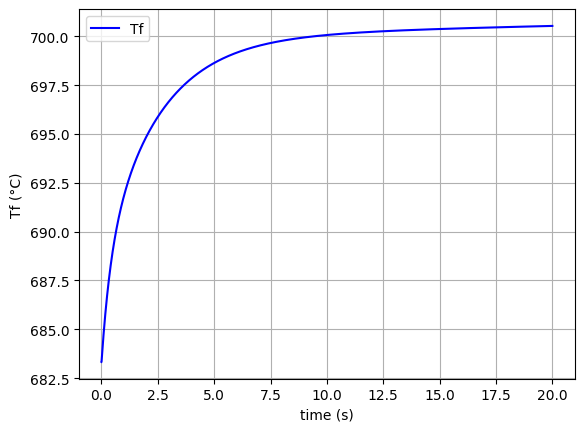

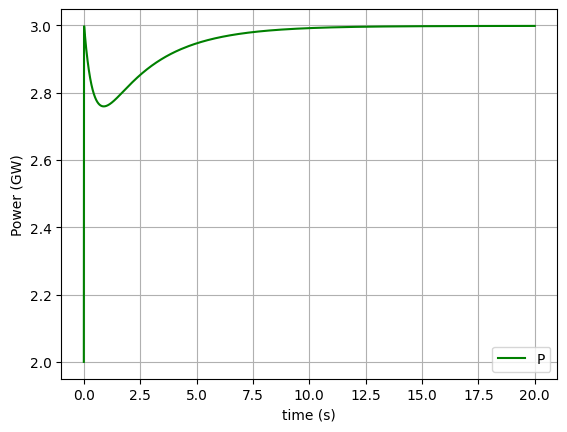

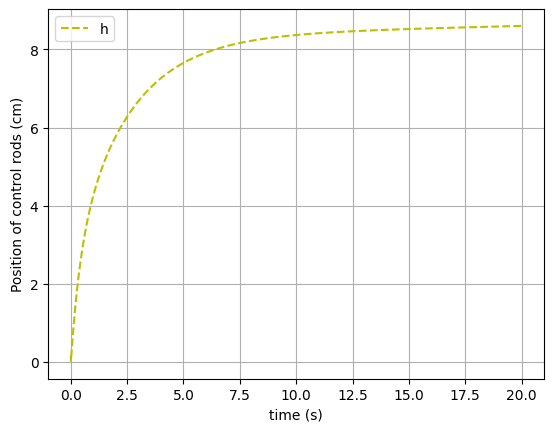

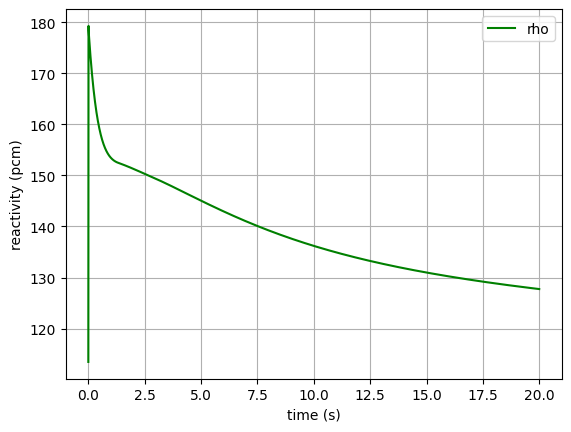

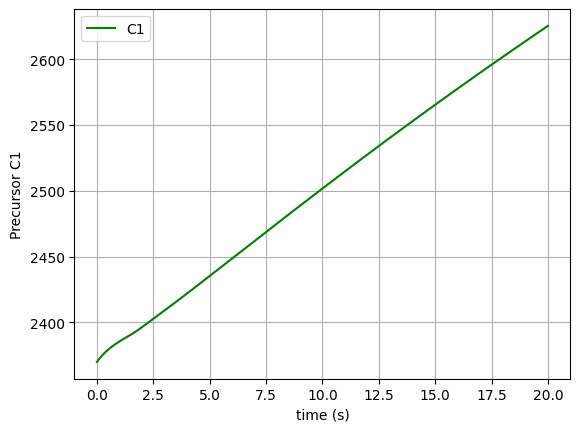

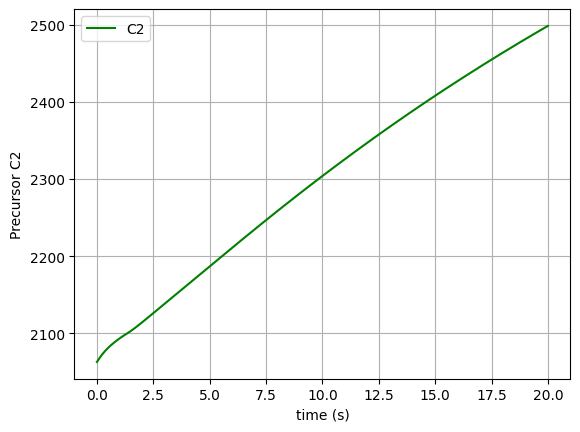

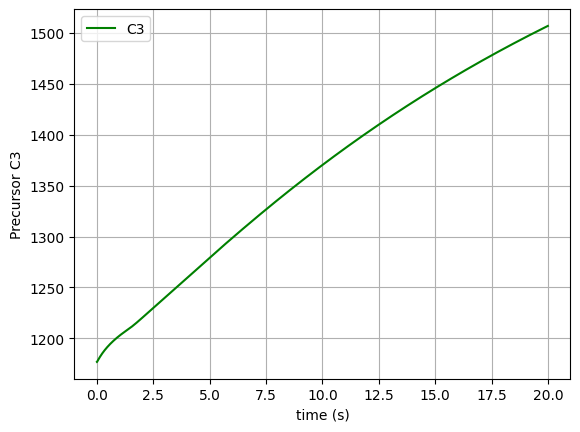

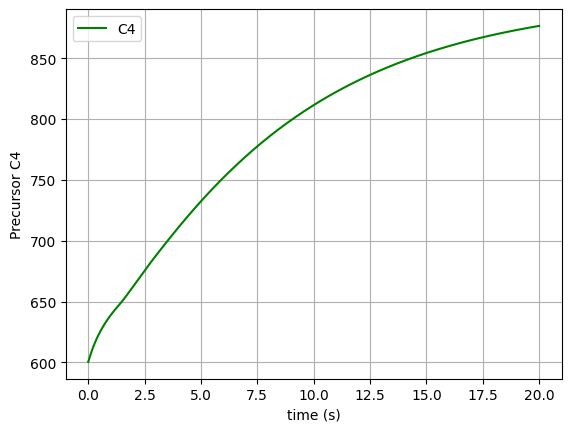

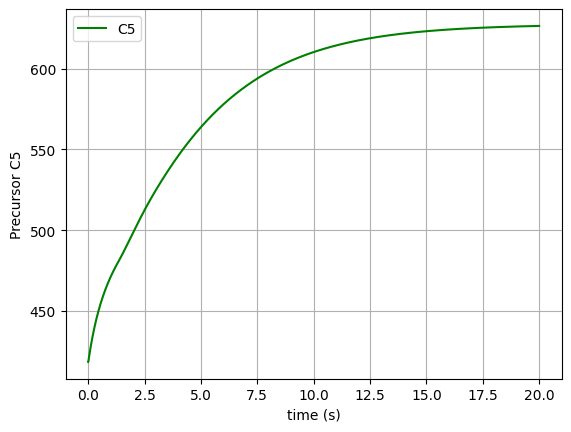

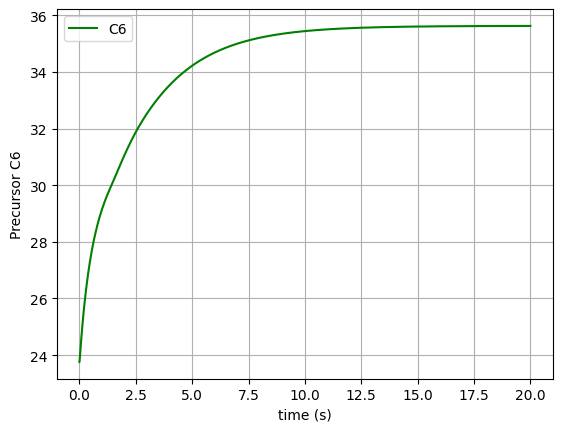

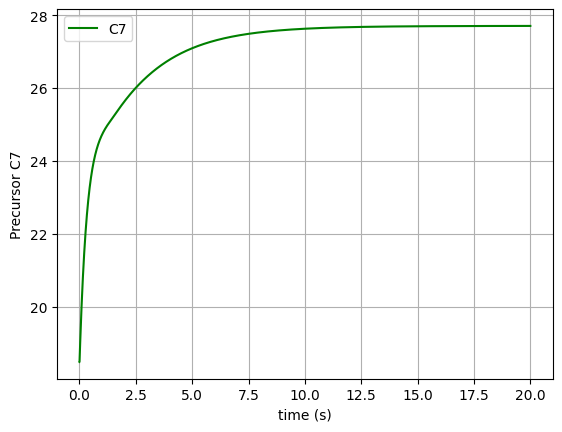

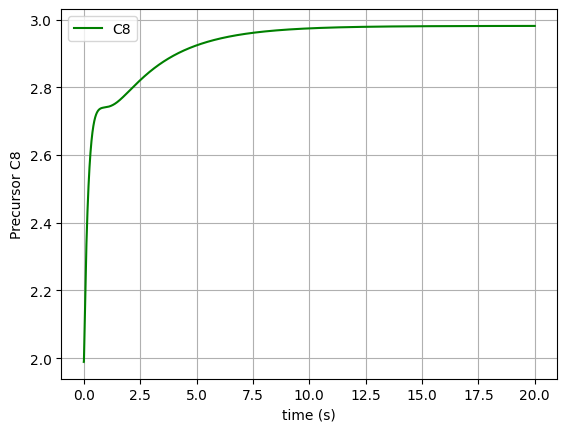

In [129]:
# Plot the quantities of interest (absolute values)
plt.plot(t,NL_Model_CN_Results[:,0],'b-',label=r'Tf')
plt.ylabel('Tf (°C)')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_CN_Results[:,1]/10**9,'g-',label=r'P')
plt.ylabel('Power (GW)')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
new=Kp * NL_Model_CN_Results[:,10]+ Ki * NL_Model_CN_Results[:,11]
dh = np.minimum(Kp * NL_Model_CN_Results[:,10]+ Ki * NL_Model_CN_Results[:,11], Max_reactivity/alpha_h)
dh[:10] = 0
plt.plot(t,dh,'y--',label=r'h')
plt.ylabel('Position of control rods (cm)')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
rho_arr = np.zeros((8,len(t)))
for i in range(8):
    rho_arr[i]=L/NL_Model_CN_Results[:,1]*li[i]*NL_Model_CN_Results[:,i+2]
    rho_ext_input = alpha_h*dh
    rho_ext = rho_ext_input+b-(rho_arr[0]+rho_arr[1]+rho_arr[2]+rho_arr[3]+rho_arr[4]+rho_arr[5]+rho_arr[6]+rho_arr[7])
rho = (rho_ext+alpha_f*(NL_Model_CN_Results[:,0]-Tf_0))
plt.plot(t,rho*10**5,'g-',label=r'rho')
plt.ylabel('reactivity (pcm)')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.plot(t,NL_Model_CN_Results[:,2]/10**9,'g-',label=r'C1')
plt.ylabel('Precursor C1')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_CN_Results[:,3]/10**9,'g-',label=r'C2')
plt.ylabel('Precursor C2')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_CN_Results[:,4]/10**9,'g-',label=r'C3')
plt.ylabel('Precursor C3')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_CN_Results[:,5]/10**9,'g-',label=r'C4')
plt.ylabel('Precursor C4')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_CN_Results[:,6]/10**9,'g-',label=r'C5')
plt.ylabel('Precursor C5')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_CN_Results[:,7]/10**9,'g-',label=r'C6')
plt.ylabel('Precursor C6')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_CN_Results[:,8]/10**9,'g-',label=r'C7')
plt.ylabel('Precursor C7')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,NL_Model_CN_Results[:,9]/10**9,'g-',label=r'C8')
plt.ylabel('Precursor C8')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()

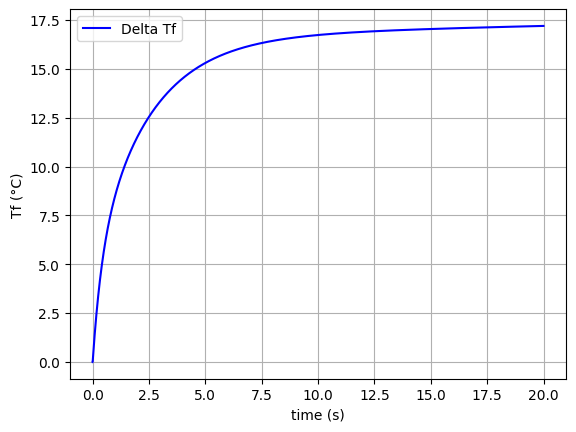

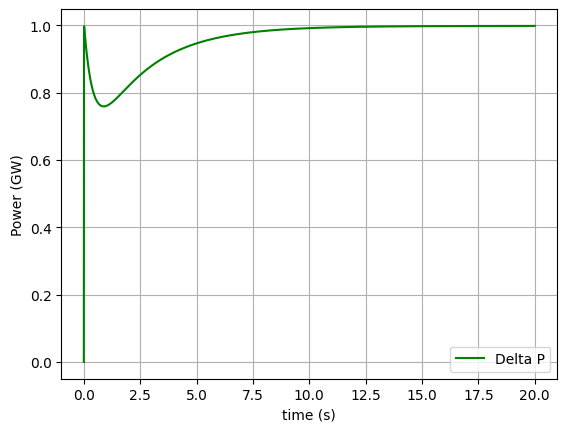

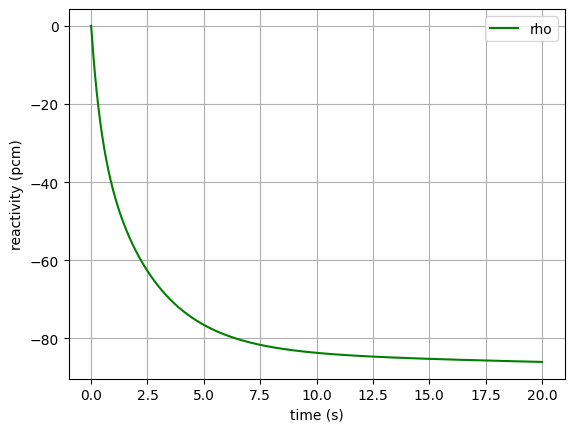

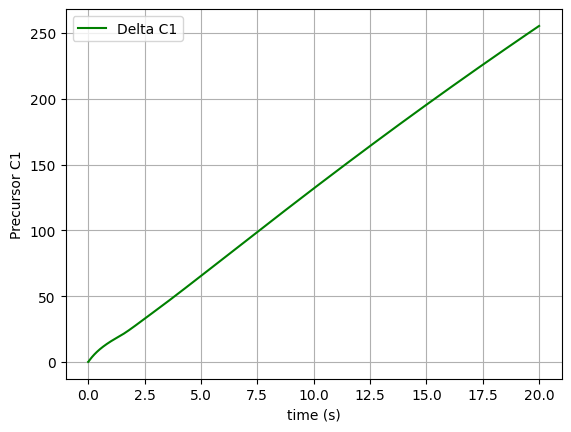

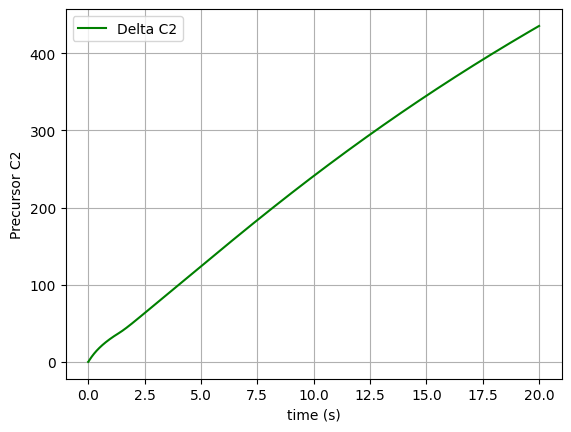

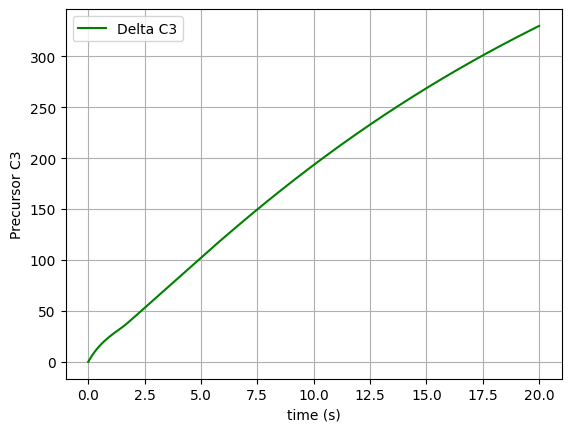

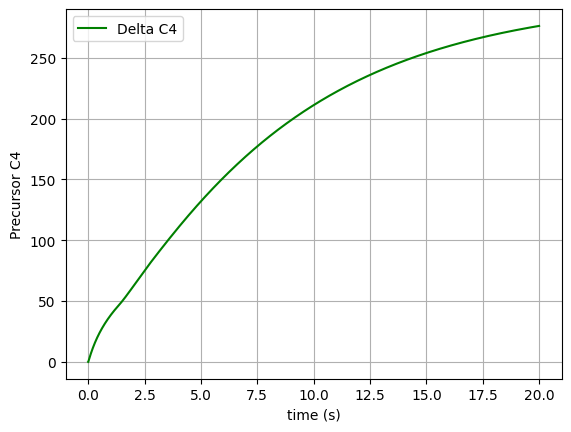

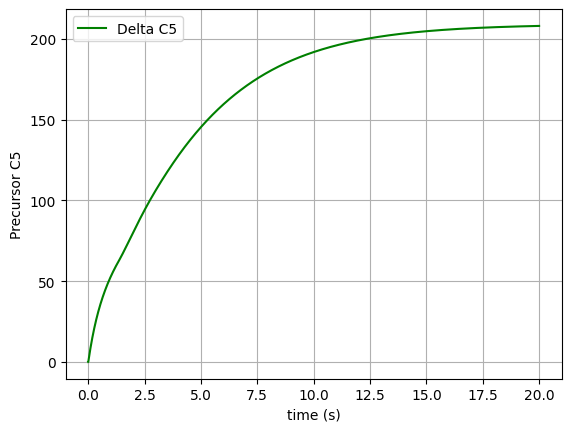

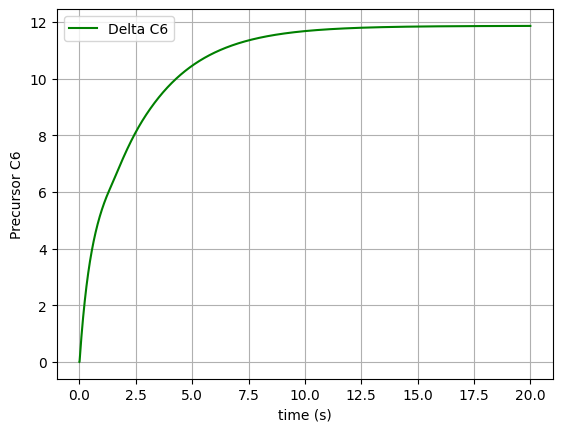

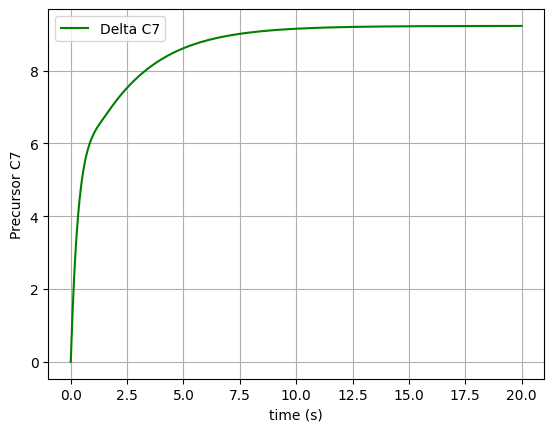

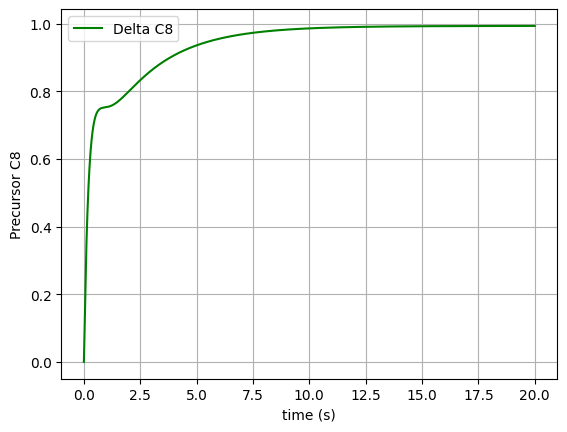

In [130]:
# Plotting the quantities of interest (variations from the initial conditions)
plt.plot(t,NL_Model_CN_Results[:,0]-MSR_0_C[0],'b-',label=r'Delta Tf')
plt.ylabel('Tf (°C)')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,(NL_Model_CN_Results[:,1]-MSR_0_C[1])/10**9,'g-',label=r'Delta P')
plt.ylabel('Power (GW)')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
rho_arr = np.zeros((8,len(t)))
for i in range(8):
    rho_arr[i]=L/NL_Model_CN_Results[:,1]*li[i]*NL_Model_CN_Results[:,i+2]
    rho_ext_input = alpha_h*dh
    rho_ext = rho_ext_input+b-(rho_arr[0]+rho_arr[1]+rho_arr[2]+rho_arr[3]+rho_arr[4]+rho_arr[5]+rho_arr[6]+rho_arr[7])
rho = (rho_ext+alpha_f*(NL_Model_CN_Results[:,0]-Tf_0))
plt.plot(t,(rho-rho_ext)*10**5,'g-',label=r'rho')
plt.ylabel('reactivity (pcm)')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,(NL_Model_CN_Results[:,2]-MSR_0_C[2])/10**9,'g-',label=r'Delta C1')
plt.ylabel('Precursor C1')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,(NL_Model_CN_Results[:,3]-MSR_0_C[3])/10**9,'g-',label=r'Delta C2')
plt.ylabel('Precursor C2')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,(NL_Model_CN_Results[:,4]-MSR_0_C[4])/10**9,'g-',label=r'Delta C3')
plt.ylabel('Precursor C3')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,(NL_Model_CN_Results[:,5]-MSR_0_C[5])/10**9,'g-',label=r'Delta C4')
plt.ylabel('Precursor C4')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,(NL_Model_CN_Results[:,6]-MSR_0_C[6])/10**9,'g-',label=r'Delta C5')
plt.ylabel('Precursor C5')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,(NL_Model_CN_Results[:,7]-MSR_0_C[7])/10**9,'g-',label=r'Delta C6')
plt.ylabel('Precursor C6')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,(NL_Model_CN_Results[:,8]-MSR_0_C[8])/10**9,'g-',label=r'Delta C7')
plt.ylabel('Precursor C7')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()
#
plt.plot(t,(NL_Model_CN_Results[:,9]-MSR_0_C[9])/10**9,'g-',label=r'Delta C8')
plt.ylabel('Precursor C8')
plt.xlabel('time (s)')
plt.legend(loc='best')
plt.grid()
plt.show()

In [131]:
# Saving the results in a .csv file
# Collecting data
Temperature = NL_Model_CN_Results[:,0]
Power = NL_Model_CN_Results[:,1]/10**9
Precursor_C1 = NL_Model_CN_Results[:,2]/10**9
Precursor_C2 = NL_Model_CN_Results[:,3]/10**9
Precursor_C3 = NL_Model_CN_Results[:,4]/10**9
Precursor_C4 = NL_Model_CN_Results[:,5]/10**9
Precursor_C5 = NL_Model_CN_Results[:,6]/10**9
Precursor_C6 = NL_Model_CN_Results[:,7]/10**9
Precursor_C7 = NL_Model_CN_Results[:,8]/10**9
Precursor_C8 = NL_Model_CN_Results[:,9]/10**9
timee=[T_start, T_end, 100]
Simulation_Results = np.array([Temperature, Power, rho, dh, Precursor_C1, Precursor_C2, Precursor_C3, Precursor_C4, Precursor_C5, Precursor_C6, Precursor_C7, Precursor_C8])

filename = os.path.join(os.path.expanduser("~"), "Desktop", "Python", "Nuclear Reactor Simulation", "Simulation_Results.csv")
os.makedirs(os.path.dirname(filename), exist_ok=True)

with open(filename, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    for row in Simulation_Results:
        writer.writerow(row)

print("Simulation results saved to file:", filename)

Simulation results saved to file: /root/Desktop/Python/Nuclear Reactor Simulation/Simulation_Results.csv


In [132]:
#print(Simulation_Results[3])

# Machine Learning Prediction

In [133]:
# Optionnal : Recovery of the data saved in the csv files
filename = os.path.join(os.path.expanduser("~"), "Desktop", "Python", "Nuclear Reactor Simulation", "Simulation_Results.csv")
if os.path.exists(filename):
    with open(filename, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        rows = []
        for row in csv_reader:
            row_array = np.array(row, dtype=float)
            rows.append(row_array)
        Recovered_Results= np.array(rows)
print("Simulation results recovered from the file and stored in the matrix :", Recovered_Results)

Simulation results recovered from the file and stored in the matrix : [[6.83330814e+02 6.83330814e+02 6.83331977e+02 ... 7.00532838e+02
  7.00532866e+02 7.00532894e+02]
 [2.00000000e+00 2.20000000e+00 2.39181218e+00 ... 2.99855594e+00
  2.99855601e+00 2.99855608e+00]
 [1.13454154e-03 1.31321958e-03 1.45642602e-03 ... 1.27736129e-03
  1.27735600e-03 1.27735071e-03]
 ...
 [2.37608381e+01 2.37608381e+01 2.37616279e+01 ... 3.56220171e+01
  3.56220186e+01 3.56220201e+01]
 [1.84807986e+01 1.84807986e+01 1.84821222e+01 ... 2.77074743e+01
  2.77074750e+01 2.77074757e+01]
 [1.98884621e+00 1.98884621e+00 1.98912372e+00 ... 2.98181558e+00
  2.98181565e+00 2.98181573e+00]]


In [134]:
# Definition of the train and test set
# Determination of the numbert of data used for the testing and the evaluation
Nb_data_test = 300
Nb_data_evaluation = 1000
step = int(len(Simulation_Results[0])/Nb_data_evaluation)
start_index = 0
end_index = start_index + step * Nb_data_evaluation

Slope =  0.03745676263016691
Intercept =  2.6717022818437037


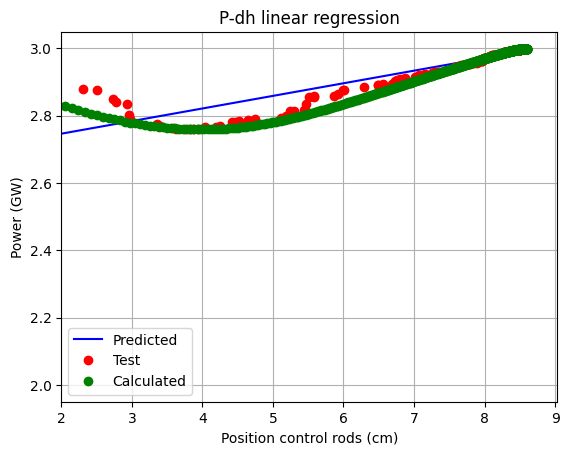

In [135]:
# P,dh
# Test data (P,dh)
x_test_dh = Simulation_Results[3,sorted(np.random.choice(len(Simulation_Results[3]), size=Nb_data_test, replace=False))]
y_test_p = Simulation_Results[1,sorted(np.random.choice(len(Simulation_Results[1]), size=Nb_data_test, replace=False))]

# Evaluation data (P,dh)
x_eval_dh = Simulation_Results[3,start_index:end_index:step]
y_eval_p = Simulation_Results[1,start_index:end_index:step]
# Linear regression (P,dh)
result_p_dh = scipy.stats.linregress(x_test_dh, y_test_p)
slope_p_dh=result_p_dh.slope
intercept_p_dh=result_p_dh.intercept
print("Slope = ", slope_p_dh)
print("Intercept = ", intercept_p_dh)
# Plotting the results

h=Simulation_Results[3]
#h = np.linspace(0, 10, 100)
plt.plot(h, intercept_p_dh+slope_p_dh*h, 'b', label=r'Predicted')
plt.plot(x_test_dh, y_test_p, 'ro', label=r'Test')
plt.plot(x_eval_dh, y_eval_p, 'go', label=r'Calculated')
plt.ylabel('Power (GW)')
plt.xlabel('Position control rods (cm)')
plt.legend(loc='best')
plt.title("P-dh linear regression")
plt.grid()
# Within the partial insertion region (2–9 cm)
plt.xlim(left=2)
plt.show()

Slope =  42.81280261496662
Intercept =  572.0005054438747


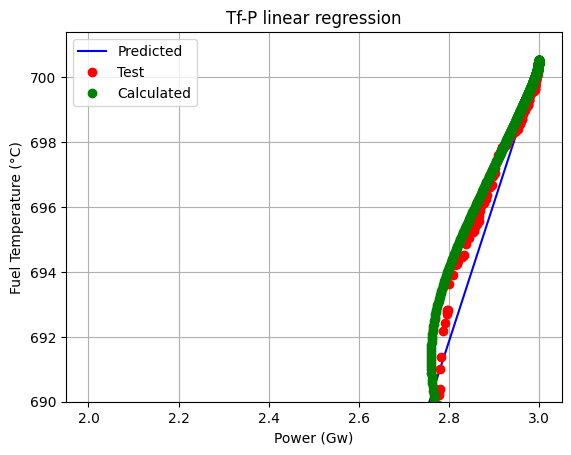

In [136]:
# Test data (Tf,P)
x_test_P = Simulation_Results[1,sorted(np.random.choice(len(Simulation_Results[1]), size=Nb_data_test, replace=False))]
y_test_Tf = Simulation_Results[0,sorted(np.random.choice(len(Simulation_Results[0]), size=Nb_data_test, replace=False))]
# Evaluation data (P,dh)
x_eval_P = Simulation_Results[1,start_index:end_index:step]
y_eval_Tf = Simulation_Results[0,start_index:end_index:step]
# Linear regression (P,dh)
result_P_Tf = scipy.stats.linregress(x_test_P, y_test_Tf)
slope_P_Tf=result_P_Tf.slope
intercept_P_Tf=result_P_Tf.intercept
print("Slope = ", slope_P_Tf)
print("Intercept = ", intercept_P_Tf)
# Plotting the results
h = np.linspace(2.7, 3, 1000)
plt.plot(h, intercept_P_Tf+slope_P_Tf*h, 'b', label=r'Predicted')
plt.plot(x_test_P, y_test_Tf, 'ro', label=r'Test')
plt.plot(x_eval_P, y_eval_Tf, 'go', label=r'Calculated')
plt.ylabel('Fuel Temperature (°C)')
plt.xlabel('Power (Gw)')
plt.legend(loc='best')
plt.title("Tf-P linear regression")
plt.grid()
#Data are presented for operating temperatures around 700 °C (reference point)
plt.ylim(bottom=690)
plt.show()

Slope =  -5.714529911528111e-05
Intercept =  0.0018359351462074365


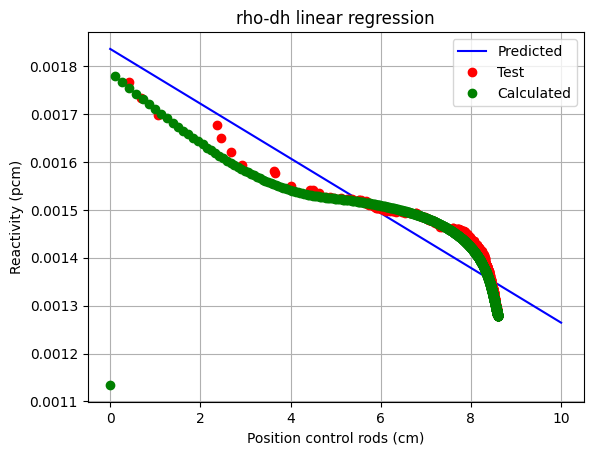

In [137]:
# Test data (rho,dh)
x_test_dh = Simulation_Results[3,sorted(np.random.choice(len(Simulation_Results[3]), size=Nb_data_test, replace=False))]
y_test_rho = Simulation_Results[2,sorted(np.random.choice(len(Simulation_Results[1]), size=Nb_data_test, replace=False))]
# Evaluation data (Tf,P)
x_eval_dh = Simulation_Results[3,start_index:end_index:step]
y_eval_rho = Simulation_Results[2,start_index:end_index:step]
# Linear regression (Tf,P)
result_rho_dh = scipy.stats.linregress(x_test_dh, y_test_rho)
slope_rho_dh=result_rho_dh.slope
intercept_rho_dh=result_rho_dh.intercept
print("Slope = ", slope_rho_dh)
print("Intercept = ", intercept_rho_dh)
# Plotting the results
h = np.linspace(0, 10, 1000)
plt.plot(h, intercept_rho_dh+slope_rho_dh*h, 'b', label=r'Predicted')
plt.plot(x_test_dh, y_test_rho, 'ro', label=r'Test')
plt.plot(x_eval_dh, y_eval_rho, 'go', label=r'Calculated')
plt.ylabel('Reactivity (pcm)')
plt.xlabel('Position control rods (cm)')
plt.legend(loc='best')
plt.title("rho-dh linear regression")
plt.grid()
# full reactivity
plt.show()

Slope =  242.05297173874072
Intercept =  5703.855363782124


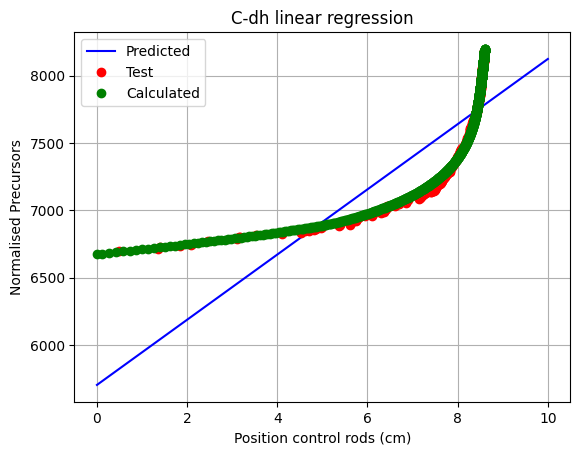

In [138]:
# Test data (Precursors,dh)
x_test_dh = Simulation_Results[3,sorted(np.random.choice(len(Simulation_Results[3]), size=Nb_data_test, replace=False))]
y_test_C = sum(Simulation_Results[i+4,sorted(np.random.choice(len(Simulation_Results[0]), size=Nb_data_test, replace=False))] for i in range(8))
# Evaluation data (Tf,dh)
x_eval_dh = Simulation_Results[3,start_index:end_index:step]
y_eval_C = sum(Simulation_Results[i+4,start_index:end_index:step] for i in range(8))
# Linear regression (Tf,dh)
result_C_dh = scipy.stats.linregress(x_test_dh, y_test_C)
slope_C_dh=result_C_dh.slope
intercept_C_dh=result_C_dh.intercept
print("Slope = ", slope_C_dh)
print("Intercept = ", intercept_C_dh)
# Plotting the results
h = np.linspace(0, 10, 1000)
plt.plot(h, intercept_C_dh+slope_C_dh*h, 'b', label=r'Predicted')
plt.plot(x_test_dh, y_test_C, 'ro', label=r'Test')
plt.plot(x_eval_dh, y_eval_C, 'go', label=r'Calculated')
plt.ylabel('Normalised Precursors')
plt.xlabel('Position control rods (cm)')
plt.legend(loc='best')
plt.title("C-dh linear regression")
plt.grid()
plt.show()

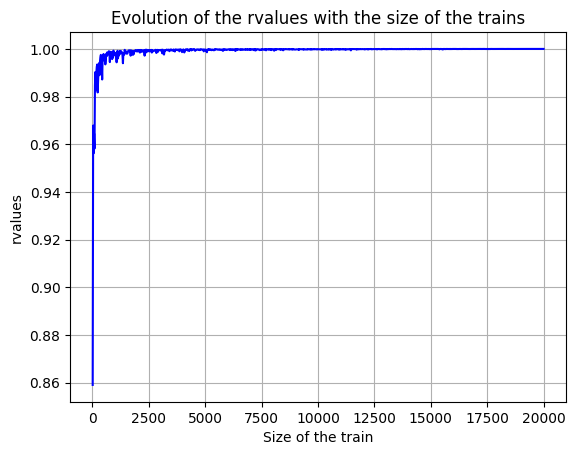

In [139]:
# Optionnal : Checking the variation of the performance of linear regression with variation of the size of the test set
Nb_data_test = np.linspace(10, 20000, 1000)
rvalues = np.zeros(len(Nb_data_test))
for i in range(len(Nb_data_test)):
    # Test data (Tf,dh)
    x_test_dh = Simulation_Results[3,sorted(np.random.choice(len(Simulation_Results[3]), size=int(Nb_data_test[i]), replace=False))]
    y_test_Tf = Simulation_Results[0,sorted(np.random.choice(len(Simulation_Results[0]), size=int(Nb_data_test[i]), replace=False))]
    # Evaluation data (Tf,dh)
    x_eval_dh = Simulation_Results[3,start_index:end_index:step]
    y_eval_Tf = Simulation_Results[0,start_index:end_index:step]
    # Linear regression (Tf,dh)
    result_Tf_dh = scipy.stats.linregress(x_test_dh, y_test_Tf)
    rvalues[i] = result_Tf_dh.rvalue
plt.plot(Nb_data_test, rvalues, 'b')
plt.ylabel('rvalues')
plt.xlabel('Size of the train')
plt.title("Evolution of the rvalues with the size of the trains")
plt.grid()
plt.show()